# ÏûîÏ∞®Î∂ÑÏÑù

## #01. ÏûîÏ∞®Î∂ÑÏÑùÏùò Ïù¥Ìï¥

### [1] ÏûîÏ∞®

Ïã§Ï†ú Í¥ÄÏ∏°Í∞íÍ≥º ÏòàÏ∏°Í∞íÏùò ÏÇ¨Ïù¥

Ï¶â, ÏòàÏ∏°Í∞íÏóê ÎåÄÌïú Ïò§Ï∞®Î•º ÏùòÎØ∏Ìï®

$$ÏûîÏ∞®=Ïã§Ï†úÍ¥ÄÏ∏°Í∞í‚àíÏòàÏ∏°Í∞í$$

### [2] ÏûîÏ∞® Î∂ÑÏÑù

ÌöåÍ∑ÄÎ∂ÑÏÑù ÏàòÌñâ ÌõÑ ÌöåÍ∑Ä Î∂ÑÏÑùÏù¥ Ï†ÅÏ†àÌïòÍ≤å ÏàòÌñâÎêòÏóàÎäîÏßÄ, Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÌï©ÌïúÏßÄÎ•º ÌèâÍ∞ÄÌïòÍ∏∞ ÏúÑÌï¥ ÏÇ¨Ïö©

ÏïÑÎûòÏùò ÏöîÍ±¥Îì§ÏùÑ Ï∂©Ï°±Ìï† Í≤ΩÏö∞ ÌöåÍ∑ÄÎ∂ÑÏÑùÏùò Í≤∞Í≥ºÎ•º Ïã†Î¢∞Ìï† Ïàò ÏûàÎã§Í≥† ÌåêÎã®Ìï®.

| Íµ¨Î∂Ñ | Í≤ÄÏ†ï Î∞©Î≤ï |
|---|---|
| ÏÑ†ÌòïÏÑ± | ÏûîÏ∞®Ïóê ÎåÄÌïú Ï†ïÍ∑úÎ∂ÑÌè¨ ÌôïÏù∏ / ÏûîÏ∞® Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî |
| Ï†ïÍ∑úÏÑ± | ÏûîÏ∞®Ïóê ÎåÄÌïú normaltest, shapiro, Kolmogorov-Smirnov Í≤ÄÏ†ï / QQPlot, ÏûîÏ∞®ÎèÑ ÏãúÍ∞ÅÌôî |
| Îì±Î∂ÑÏÇ∞ÏÑ± | Breusch-Pagan, Brown-Forsythe Í≤ÄÏ†ï |
| ÎèÖÎ¶ΩÏÑ± | ÎçîÎπà ÏôìÏä® ÌÜµÍ≥ÑÎüâ |

## #02. Ï§ÄÎπÑÏûëÏóÖ

### [1] Ìå®ÌÇ§ÏßÄ Ï∞∏Ï°∞

In [58]:
import warnings
warnings.filterwarnings(action='ignore')

from helper.regrassion import *
from helper.util import *
from helper.plot import *
from helper.analysis import *

from pandas import DataFrame
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import zscore, probplot
from statsmodels.stats.diagnostic import het_breuschpagan
# from statsmodels.stats.api import het_breuschpagan # ÏúÑÏôÄ ÎèôÏùºÌïú ÏàòÏãù

### [2] Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞

In [34]:
origin = my_read_excel("https://data.hossam.kr/mldata/boston.xlsx", info=False)
my_pretty_table(origin.head())

+----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------+
|    |    CRIM |   ZN |   INDUS |   CHAS |   NOX |    RM |   AGE |    DIS |   RAD |   TAX |   PTRATIO |      B |   LSTAT |   MEDV |
|----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------|
|  0 | 0.00632 |   18 |    2.31 |      0 | 0.538 | 6.575 |  65.2 |   4.09 |     1 |   296 |      15.3 |  396.9 |    4.98 |     24 |
|  1 | 0.02731 |    0 |    7.07 |      0 | 0.469 | 6.421 |  78.9 | 4.9671 |     2 |   242 |      17.8 |  396.9 |    9.14 |   21.6 |
|  2 | 0.02729 |    0 |    7.07 |      0 | 0.469 | 7.185 |  61.1 | 4.9671 |     2 |   242 |      17.8 | 392.83 |    4.03 |   34.7 |
|  3 | 0.03237 |    0 |    2.18 |      0 | 0.458 | 6.998 |  45.8 | 6.0622 |     3 |   222 |      18.7 | 394.63 |    2.94 |   33.4 |
|  4 | 0.06905 |    0 |    2.18 |      0 | 0.458 | 7.147 |  54.2 | 6.0622 | 

## #02. ÏÑ†ÌòïÌöåÍ∑Ä Î∂ÑÏÑù

Ïïû ÏòàÏ†úÏóêÏÑú ÎèÑÏ∂úÌïú Í≥ºÏ†ïÏùÑ Ïû¨ÌòÑÌïúÎã§.

### [1] Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

#### (1) Î∂àÌïÑÏöîÌïú ÏöîÏù∏ Ï†úÍ±∞

In [35]:
ignore = ['TAX', 'INDUS', 'AGE', 'CHAS', 'CRIM', 'RAD', 'ZN', 'B']
df = origin.drop(ignore, axis=1)
my_pretty_table(df.head())

+----+-------+-------+--------+-----------+---------+--------+
|    |   NOX |    RM |    DIS |   PTRATIO |   LSTAT |   MEDV |
|----+-------+-------+--------+-----------+---------+--------|
|  0 | 0.538 | 6.575 |   4.09 |      15.3 |    4.98 |     24 |
|  1 | 0.469 | 6.421 | 4.9671 |      17.8 |    9.14 |   21.6 |
|  2 | 0.469 | 7.185 | 4.9671 |      17.8 |    4.03 |   34.7 |
|  3 | 0.458 | 6.998 | 6.0622 |      18.7 |    2.94 |   33.4 |
|  4 | 0.458 | 7.147 | 6.0622 |      18.7 |    5.33 |   36.2 |
+----+-------+-------+--------+-----------+---------+--------+


### [2] Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†

In [36]:
x_train, x_test, y_train, y_test = my_train_test_split(df, yname="MEDV", scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 5), (152, 5), (354,), (152,))

### [3] ÏÑ†ÌòïÌöåÍ∑Ä Î∂ÑÏÑù

[ÌöåÍ∑ÄÏãù]
MEDV = -1.661 * NOX + 3.516 * RM + -2.192 * DIS + -2.192 * PTRATIO + -3.987 * LSTAT + 22.762

+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|            |   Í≤∞Ï†ïÍ≥ÑÏàò(R2) |   ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®(MAE) |   ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(MSE) |   ÌèâÍ∑†Ïò§Ï∞®(RMSE) |   ÌèâÍ∑† Ï†àÎåÄ Î∞±Î∂ÑÏò§Ï∞® ÎπÑÏú®(MAPE) |   ÌèâÍ∑† ÎπÑÏú® Ïò§Ï∞®(MPE) |
|------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ |       0.745825 |             3.27197 |             21.8049 |          4.66958 |                         16.9054 |              -3.61383 |
| Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞ |       0.603232 |             3.97022 |               32.07 |          5.66304 |                         21.3872 |              -5.53031 |
+------------+----------------+---------------------+---------------------+--------

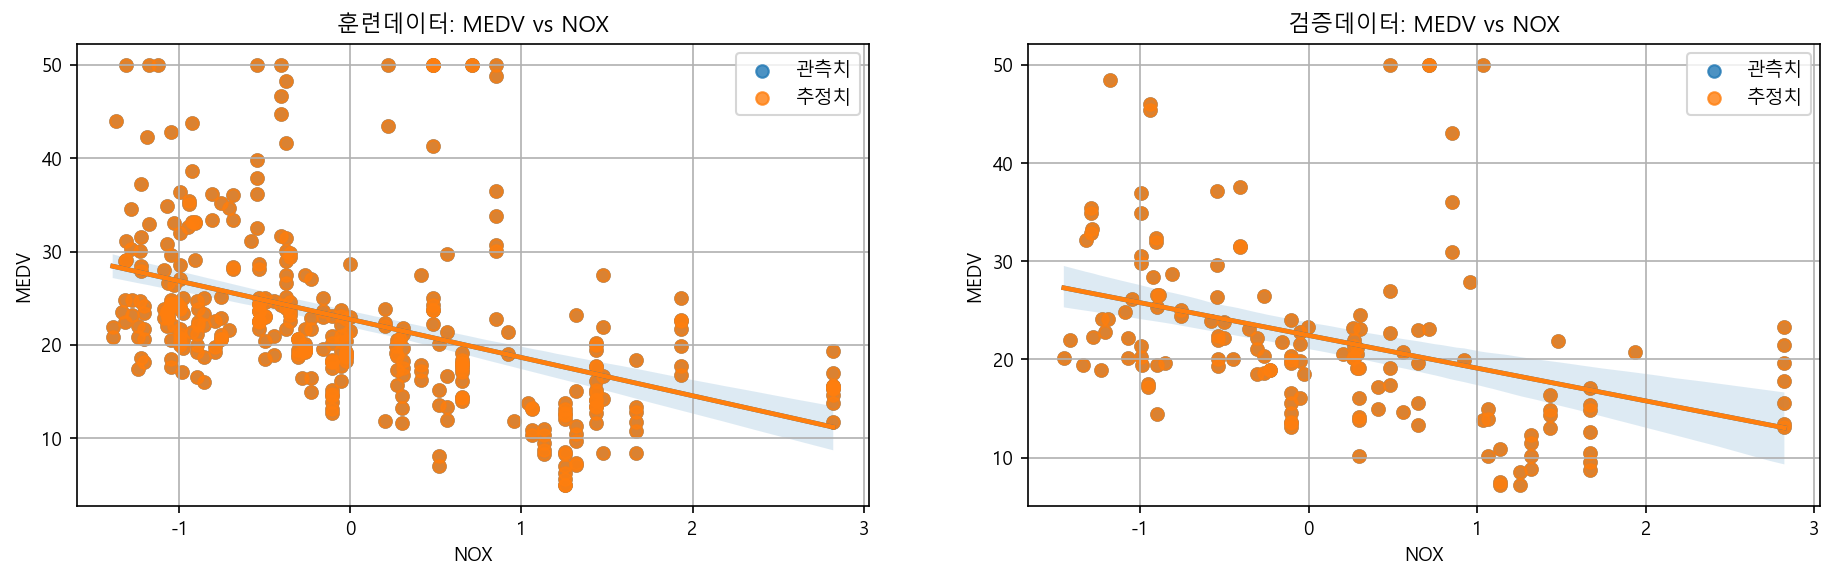

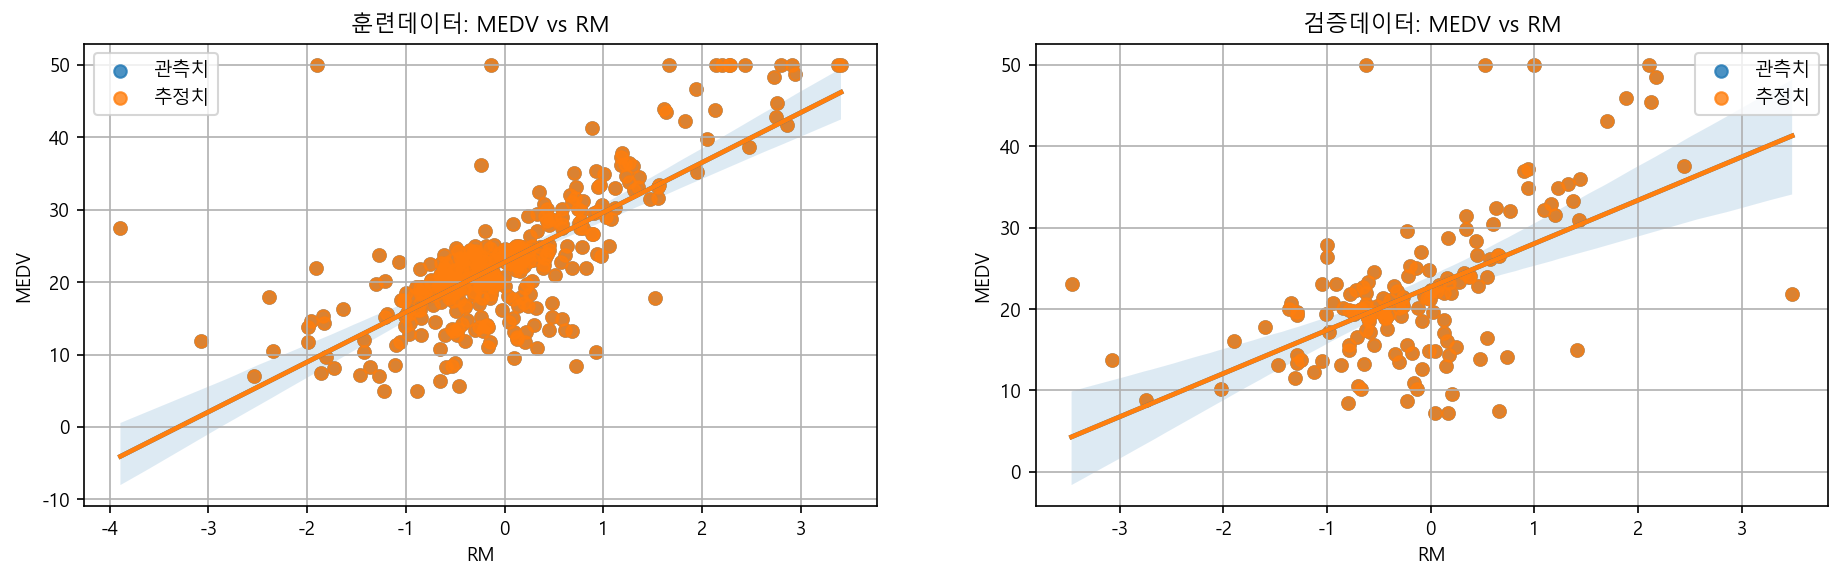

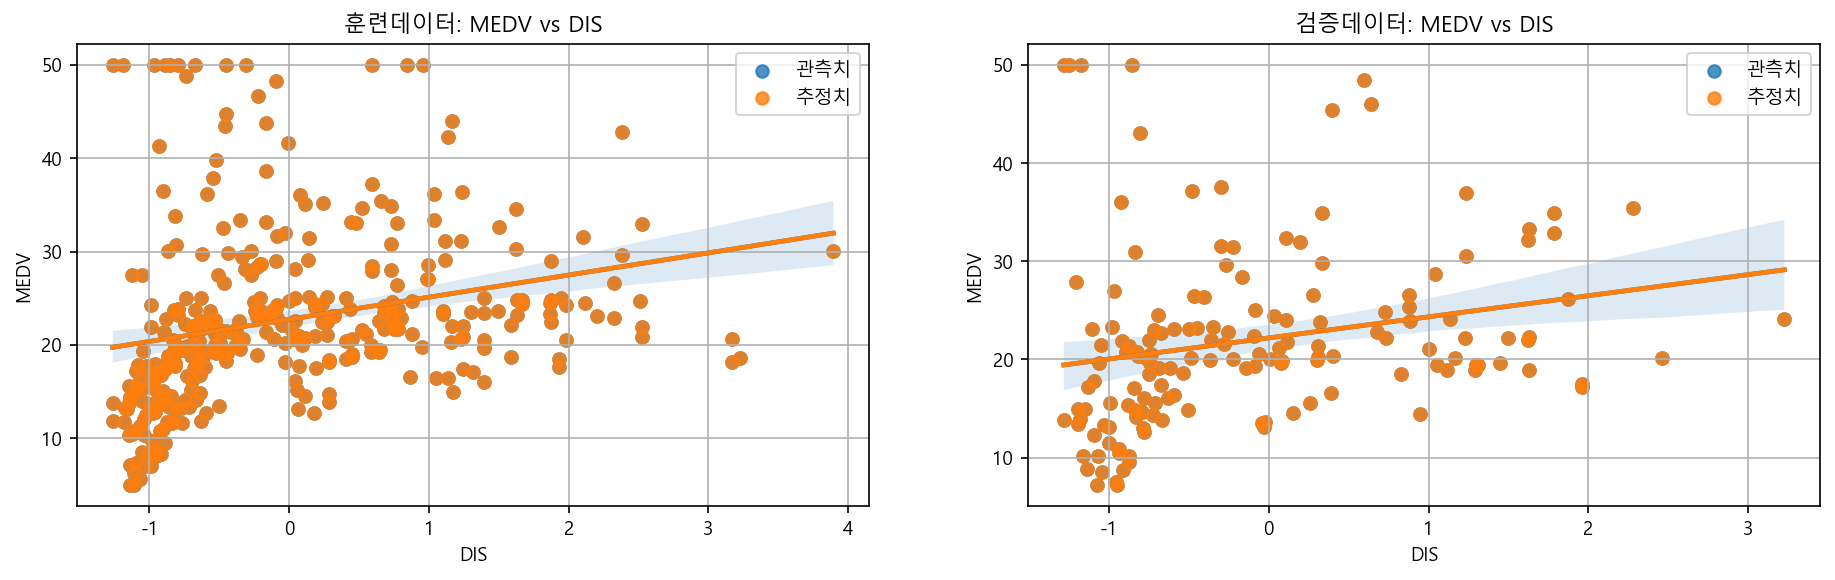

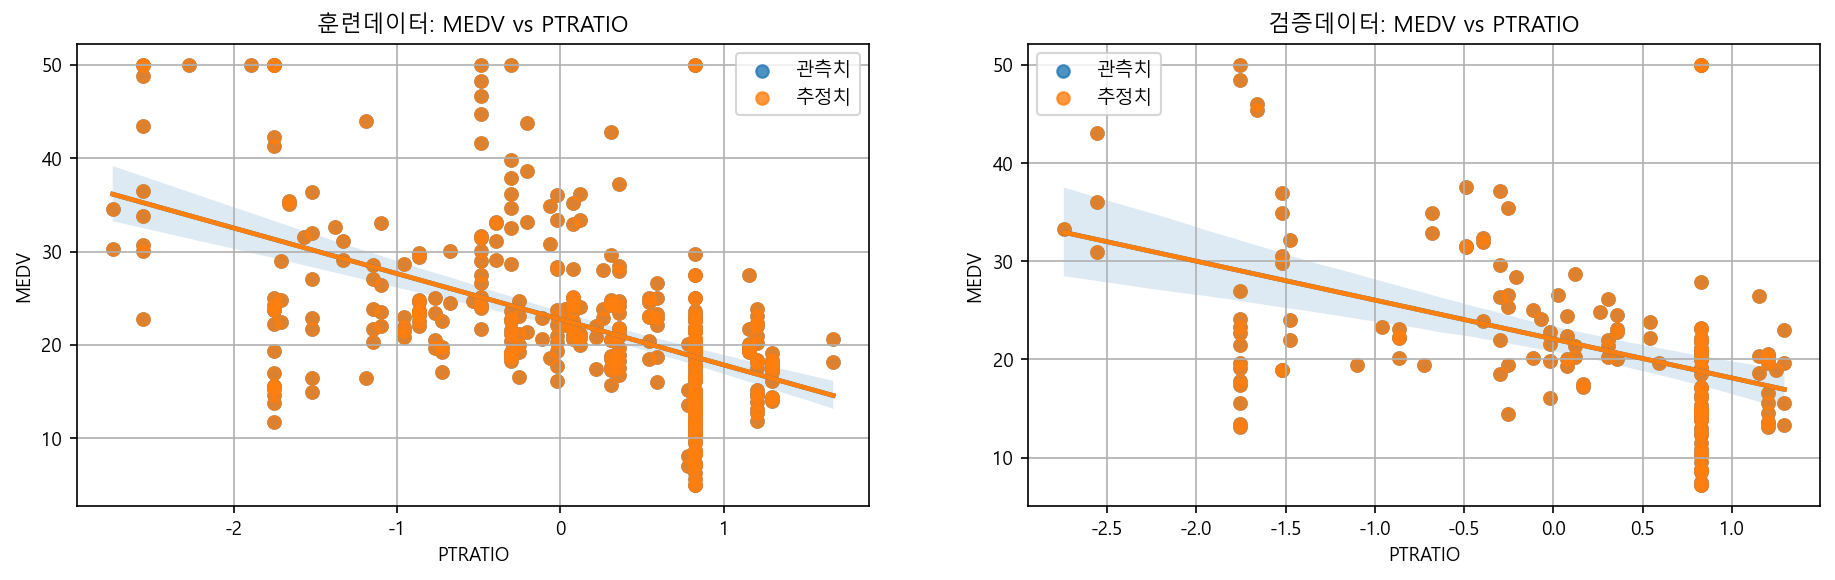

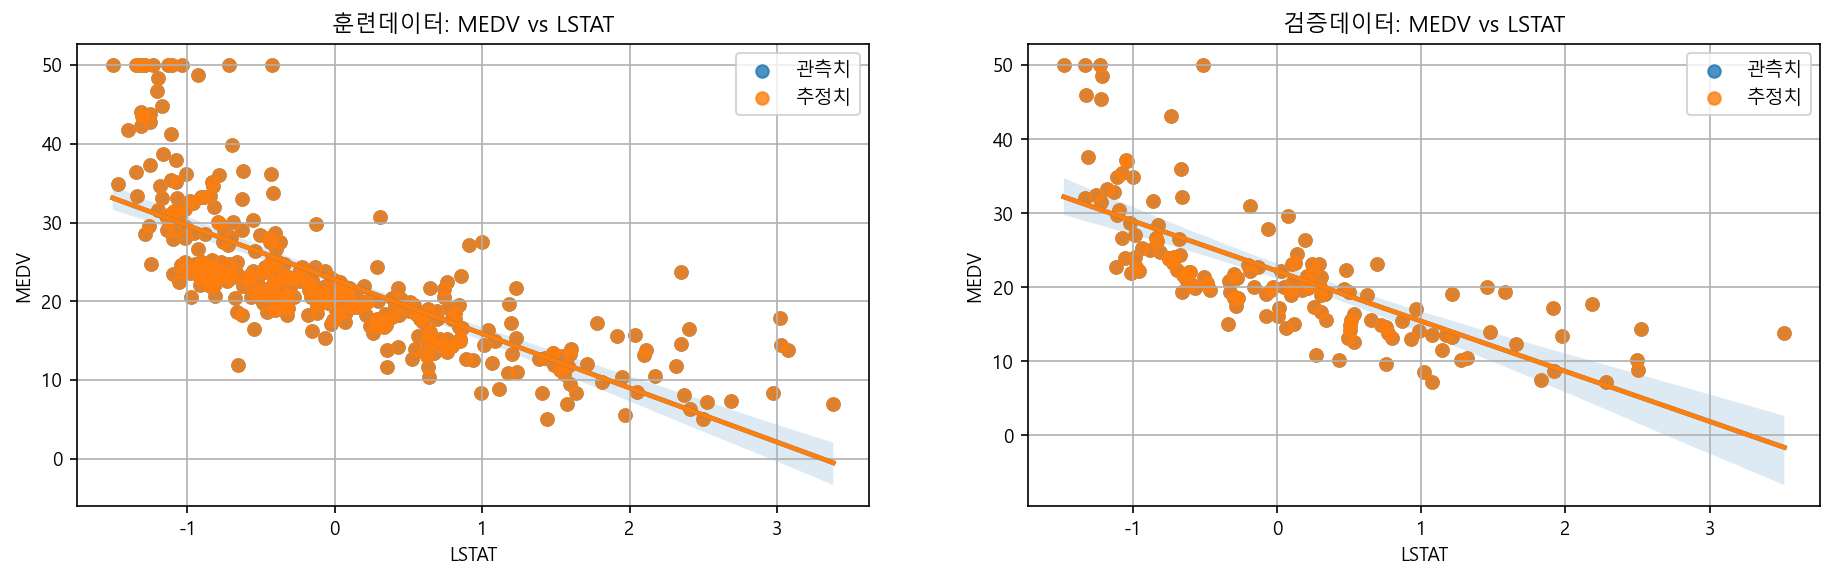

In [37]:
fit = my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=True, report=True)

## #03. ÏûîÏ∞® Î∂ÑÏÑù

ÏùºÎ∞òÏ†ÅÏúºÎ°ú Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÏàòÌñâÌïúÎã§.

### [1] ÏûîÏ∞® Íµ¨ÌïòÍ∏∞

In [38]:
# ÏòàÏ∏°Ïπò
y_pred = fit.predict(x_test)

# ÏûîÏ∞®
resid = y_test - y_pred

resid_df = DataFrame({"resid": resid}).reset_index(drop=True)
resid_df

resid
0   -6.389163
1   -1.895478
2    5.933878
3    2.961458
4    4.704038
..        ...
147 -1.480395
148 -5.978637
149  0.245207
150 -8.088950
151  2.064045

[152 rows x 1 columns]

### [2] ÏÑ†ÌòïÏÑ±

#### (1) Ï†ïÍ∑úÎ∂ÑÌè¨ ÌôïÏù∏

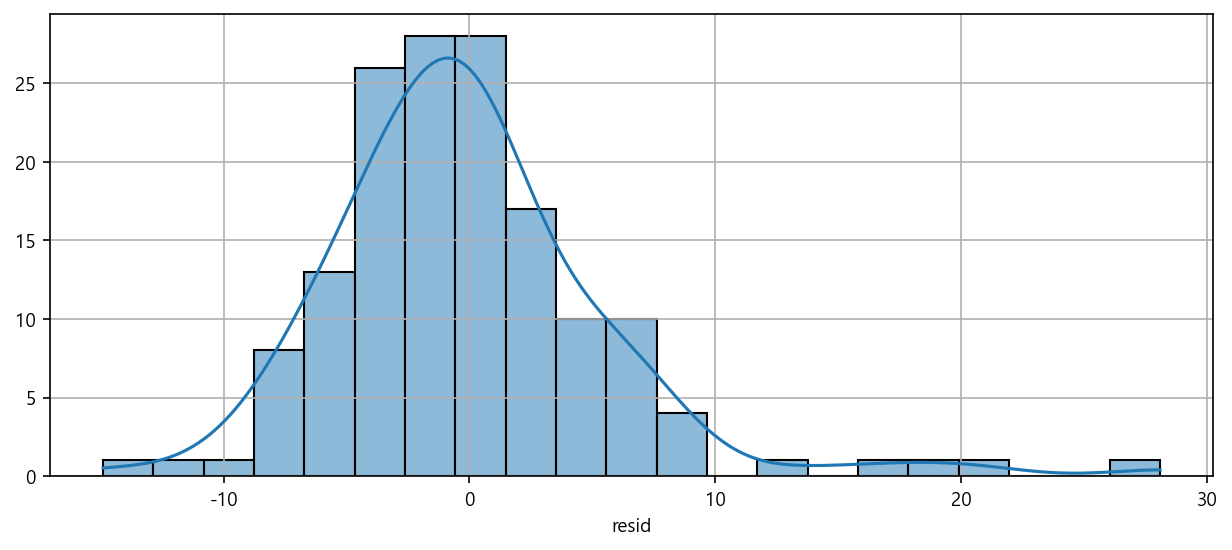

In [39]:
my_histplot(resid_df, xname='resid')

#### (2) ÏûîÏ∞® Í∑∏ÎûòÌîÑ

- Î™®Îì† ÏòàÏ∏°Í∞íÏóê ÎåÄÌïú ÏûîÏ∞®Í∞Ä Í∞ÄÏö¥Îç∞ Ï†êÏÑ†Ïóê ÎßûÏ∂îÏñ¥ ÎπÑÏä∑ÌïòÍ≤å ÏûàÏñ¥Ïïº ÌïúÎã§.
- Îπ®Í∞Ñ Ïã§ÏÑ†ÏùÄ ÏûîÏ∞®Ïùò Ï∂îÏÑ∏Î•º ÏùòÎØ∏
- Îπ®Í∞Ñ Ïã§ÏÑ†Ïù¥ Ï†êÏÑ†ÏóêÏÑú ÌÅ¨Í≤å Î≤óÏñ¥ÎÇúÎã§Î©¥ ÏûîÏ∞®Í∞Ä ÌÅ¨Í≤å Îã¨ÎùºÏßÑÎã§Îäî ÏùòÎØ∏Ïù¥ÎØÄÎ°ú ÏÑ†ÌòïÏÑ±Ïù¥ ÏóÜÎã§Îäî Í≤ÉÏù¥Îã§.

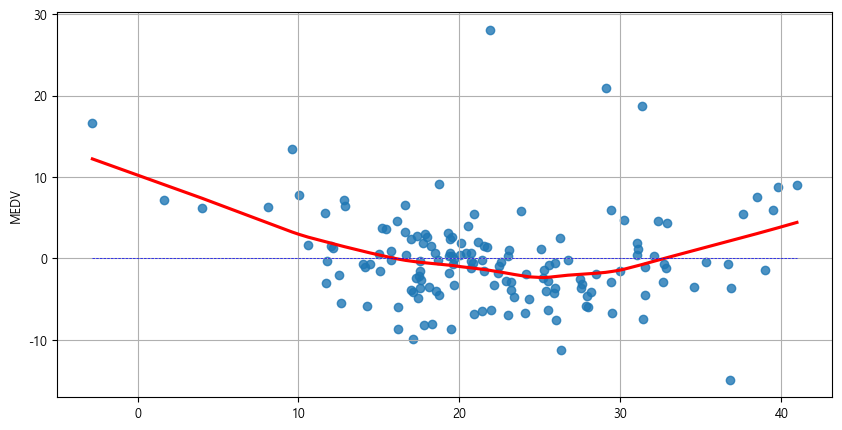

In [40]:
plt.figure(figsize=(10, 5))

sb.regplot(x=y_pred, y=resid, lowess=True, line_kws={'color': 'red'})
sb.lineplot(x=[y_pred.min(), y_pred.max()], y=[0, 0], color='blue', linestyle='--', linewidth=0.5)
plt.grid()
plt.show()
plt.close()

### [3] Ï†ïÍ∑úÏÑ±

#### (1) QQPlot

- ÏûîÏ∞®Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥Î©¥ Q-Q PlotÏóêÏÑú Ï†êÎì§Ïù¥ Ï†êÏÑ†ÏùÑ Îî∞Îùº Î∞∞ÏπòÎêúÎã§.
- Íµ¨Ìï¥ ÎÜìÏùÄ ÏòàÏ∏°Í∞íÏùÑ ÌôúÏö©ÌïòÏó¨ zscore Í∞íÏùÑ Íµ¨ÌïúÎã§.

##### probplot Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìïú ÏûêÎèô ÏÉùÏÑ±

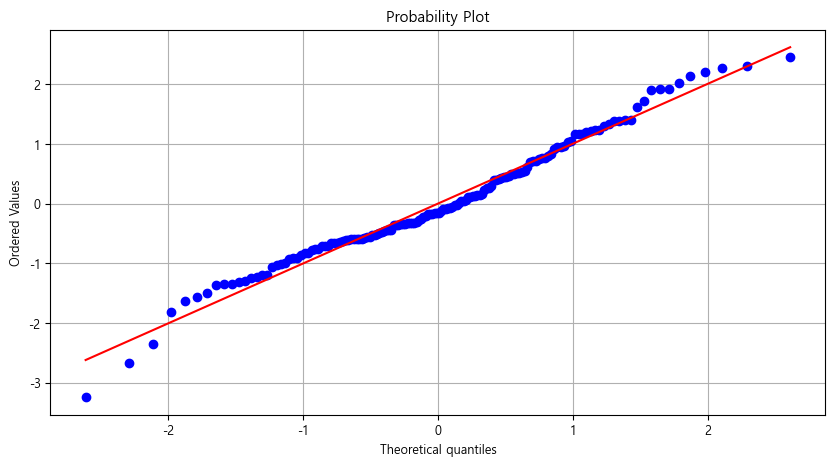

In [41]:
zs = zscore(y_pred)

plt.figure(figsize=(10, 5))
probplot(zs, plot=plt)
plt.grid()
plt.show()
plt.close()

##### x,y Ï¢åÌëúÎ•º Î∞òÌôòÎ∞õÏùÄ ÌõÑ ÏßÅÏ†ë ÏãúÍ∞ÅÌôî

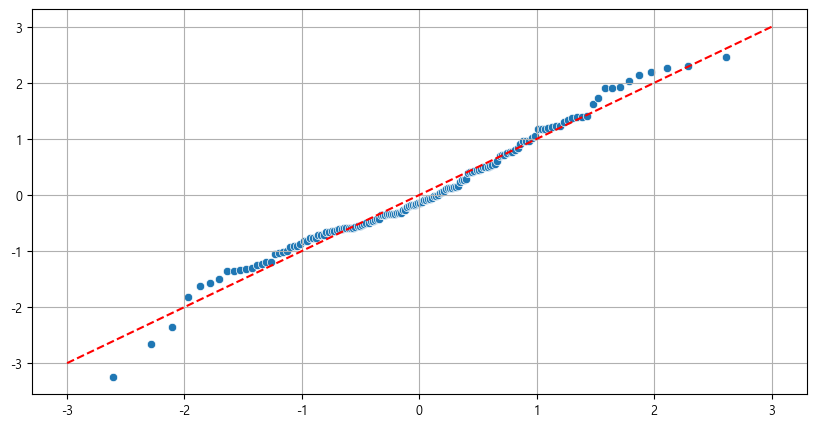

In [42]:
zs = zscore(y_pred)

plt.figure(figsize=(10, 5))
(x, y), _ = probplot(zs)

sb.scatterplot(x, y)
sb.lineplot(x=[-3, 3], y=[-3, 3], color='red', linestyle='--')

plt.grid()
plt.show()
plt.close()

#### (2) ÏûîÏ∞®ÎèÑ

ÏûîÏ∞®Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§Î©¥ ÎåÄÎûµÏ†ÅÏúºÎ°ú...

- $\pm\sqrt{MSE}$ Î≤îÏúÑ ÏïàÏóê ÏµúÏÜå `68%`Ïùò ÏûîÏ∞®Í∞Ä Ìè¨Ìï®ÎêúÎã§.
- $\pm2\sqrt{MSE}$ Î≤îÏúÑ ÏïàÏóê ÏµúÏÜå `95%`Ïùò ÏûîÏ∞®Í∞Ä Ìè¨Ìï®ÎêúÎã§.
- $\pm3\sqrt{MSE}$ Î≤îÏúÑ ÏïàÏóê ÏµúÏÜå `99%`Ïùò ÏûîÏ∞®Í∞Ä Ìè¨Ìï®ÎêúÎã§.

In [43]:
mse = mean_squared_error(y_test, y_pred)
mse_sq = np.sqrt(mse)

r1 = resid[ (resid > -mse_sq) & (resid < mse_sq)].count() / resid.count() * 100
r2 = resid[ (resid > -2*mse_sq) & (resid < 2*mse_sq)].count() / resid.count() * 100
r3 = resid[ (resid > -3*mse_sq) & (resid < 3*mse_sq)].count() / resid.count() * 100

mse_r = [r1, r2, r3]

print(f"Î£®Ìä∏ 1MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: {r1:1.2f}%")
print(f"Î£®Ìä∏ 2MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: {r2:1.2f}%")
print(f"Î£®Ìä∏ 3MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: {r3:1.2f}%")

Î£®Ìä∏ 1MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 74.34%
Î£®Ìä∏ 2MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 96.05%
Î£®Ìä∏ 3MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 98.03%


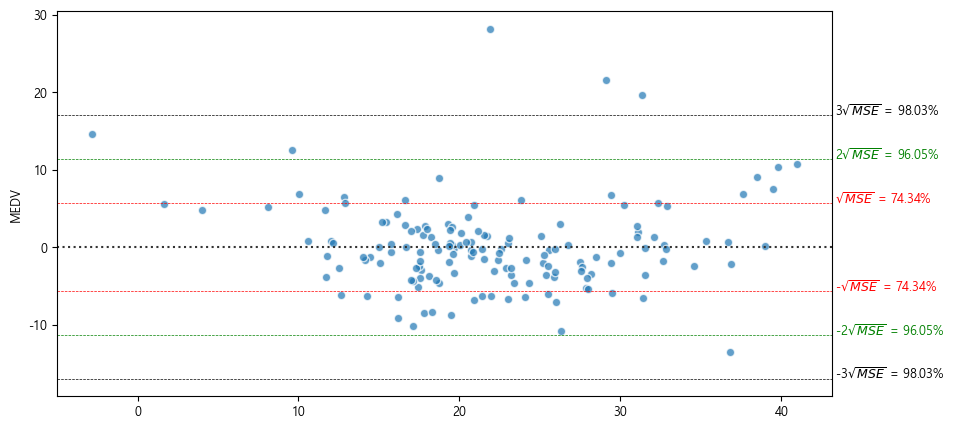

In [51]:
plt.figure(figsize=(10, 5))

# ÏùºÎ∞òÏ†ÅÏù∏ ÏûîÏ∞®ÎèÑ
# sb.residplot(x=y_pred, y=resid, lowess=True, line_kws={'color': 'red'})

sb.residplot(x=y_pred, y=resid, 
             scatter_kws = {'edgecolor':"white", "alpha":0.7})

for i, c in enumerate(['red', 'green', 'black']):
    plt.axhline(mse_sq * (i+1), color=c, linestyle='--', linewidth=0.5)
    plt.axhline(mse_sq * (-(i+1)), color=c, linestyle='--', linewidth=0.5)

# ÌòÑÏû¨ ÌëúÏãúÎêòÎäî Í∑∏ÎûòÌîÑÏùò xÏ∂ï Î≤îÏúÑÎ•º Í∞ÄÏ†∏Ïò®Îã§.
xmin, xmax = plt.xlim()

for i, c in enumerate(['red', 'green', 'black']):
    if i:
        plt.text(s=f"{i+1}"r'${}\sqrt{MSE}$'f" = {mse_r[i]:.2f}%", x=xmax+0.2, y=(i+1)*mse_sq, color=c)
        # r'$ $'Ïùò ÌëúÌòÑÏãùÏù¥ ÎùºÌÖçÏä§ ÌëúÍ∏∞Î≤ïÏúºÎ°ú ÏÇ¨Ïö©ÎêòÎäî Í≤ÉÏùÄ plt.text()ÏïàÏóê ÌååÎùºÎØ∏ÌÑ∞Î°ú Ï†ÑÎã¨ÎêòÏóàÏùÑ ÎïåÎßå ÎùºÌÖçÏä§ÌëúÍ∏∞Î≤ïÏúºÎ°ú ÌëúÌòÑÎê®
        plt.text(s=f"-{i+1}"r'${}\sqrt{MSE}$'f" = {mse_r[i]:.2f}%" , x=xmax+0.2, y=-(i+1)*mse_sq, color=c)
    else:
        plt.text(s=f""r'${}\sqrt{MSE}$'f" = {mse_r[i]:.2f}%", x=xmax+0.2, y=(i+1)*mse_sq, color=c)
        plt.text(s=f"-"r'${}\sqrt{MSE}$'f" = {mse_r[i]:.2f}%" , x=xmax+0.2, y=-(i+1)*mse_sq, color=c)

plt.show()
plt.close()

### [4] Îì±Î∂ÑÏÇ∞ÏÑ± (Î∏åÎ°úÏù¥Ïäà-Ìå®Í±¥ Í≤ÄÏ†ï)

| Í∞ÄÏÑ§ | ÎÇ¥Ïö© |
|--|--|
| Í∑ÄÎ¨¥Í∞ÄÏÑ§ | Îì±Î∂ÑÏÇ∞ÏÑ± Í∞ÄÏ†ïÏù¥ ÎßåÏ°±ÎêúÎã§ (Ïò§Ï∞®Ïùò Î∂ÑÏÇ∞ÏùÄ ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§Í≥º Í¥ÄÎ†®Ïù¥ ÏóÜÎã§) |
| ÎåÄÎ¶ΩÍ∞ÄÏÑ§ | Îì±Î∂ÑÏÇ∞ÏÑ± Í∞ÄÏ†ïÏù¥ ÎßåÏ°±ÎêòÏßÄ ÏïäÎäîÎã§(Ïò§Ï∞®Ïùò Î∂ÑÏÇ∞ÏùÄ ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§Í≥º Í¥ÄÎ†®Ïù¥ ÏûàÎã§) |

In [56]:
x_test_copy = x_test.copy()
x_test_copy.insert(0, "const", 1)
bs_result = het_breuschpagan(resid, x_test_copy)
bs_result_df = DataFrame(bs_result, columns=['values'], index=['statistic', 'p-value', 'f-value', 'f p-value'])
my_pretty_table(bs_result_df)

"Îì±Î∂ÑÏÇ∞ÏÑ± Í∞ÄÏ†ï Ï∂©Ï°±" if bs_result[1] > 0.05 else "Îì±Î∂ÑÏÇ∞ÏÑ± Í∞ÄÏ†ï ÏúÑÎ∞∞"

+-----------+------------+
|           |     values |
|-----------+------------|
| statistic |    15.8699 |
| p-value   | 0.00722541 |
| f-value   |    3.40411 |
| f p-value | 0.00613298 |
+-----------+------------+


'Îì±Î∂ÑÏÇ∞ÏÑ± Í∞ÄÏ†ï ÏúÑÎ∞∞'

### [5] ÎèÖÎ¶ΩÏÑ±

ÌöåÍ∑ÄÎ∂ÑÏÑù Í≤∞Í≥ºÌëú ÌïòÎã®Ïùò Dubin-Watson Í∞íÏùÑ ÌôïÏù∏ÌïúÎã§.

| ÏàòÏπò | Ìï¥ÏÑù |
|---|---|
| `0` | ÏûîÏ∞®Îì§Ïù¥ ÏñëÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ (ÎèÖÎ¶ΩÏÑ± X) |
| `2` | ÏûîÏ∞®Îì§Ïù¥ ÎèÖÎ¶Ω |
| `4` | ÏûîÏ∞®Îì§Ïù¥ ÏùåÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ (ÎèÖÎ¶ΩÏÑ± X) |

ÏùºÎ∞òÏ†ÅÏúºÎ°ú DWÍ∞íÏù¥ `1.5` ~ `2.5` Î≤îÏúÑÏóê ÏûàÏúºÎ©¥ ÎèÖÎ¶ΩÏúºÎ°ú ÌåêÏ†ï

In [45]:
dw = durbin_watson(resid)
print(f"Durbin-Watson: {dw}, ÎèÖÎ¶ΩÏÑ± Í∞ÄÏ†ï ÎßåÏ°± Ïó¨Î∂Ä: {dw > 1.5 and dw < 2.5}")

Durbin-Watson: 1.9279407375238424, ÎèÖÎ¶ΩÏÑ± Í∞ÄÏ†ï ÎßåÏ°± Ïó¨Î∂Ä: True
